# Studies of data reuse: Ventral midbrain electrical microstimulation induces perceptual learning in primates

In this notebook we will look more closely at the EBRAINS dataset "[Ventral midbrain electrical microstimulation induces perceptual learning in primates](https://doi.org/10.25493/12X0-NBY)", contributed by Wim Vanduffel from KU Leuven, Belgium.

As we can see from the dataset description,

<i>This dataset provides a characterization of pairing task-irrelevant visual stimuli with microstimulation of a dopaminergic center, the ventral tegmental area (VTA), in macaques. This is the first causal
demonstration of the role of neuromodulatory centers in VPL in primates.</i>
More information is available in the [Data Descriptor](https://object.cscs.ch/v1/AUTH_227176556f3c4bb38df9feea4b91200c/hbp-d000021_vta_em_perceptual_learning_pub/DataDescriptor.pdf).

This dataset forms part of the results reported in Vanduffel, W., Arsenault, J.T. (2019) Ventral midbrain stimulation induces perceptual learning and cortical plasticity in primates. *Nature Communications**10**:3591. https://www.nature.com/articles/s41467-019-11527-9#Abs1

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes:

Figure 4 and figure 1b were easily reproduced with the data available on ebrains. However, it was not possible to reproduce any other figure. The significant orientation classification accuracy data was not available, it was therefore not possible to reproduce fig 3b. Furthermore there were only time ranges instead of time values which prevented the reproduction of figure 1a: a Peri-stimulus time histogram of normalized MUA. 

In [1]:
#prepare the notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)


/home/isaurebotherel/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [24]:
#present the data
#motion discrimination data d_prime
df=pd.read_csv("motion_discrimination_d_prime.csv")
print('motion discrimination data d_prime','\n',df)
#motion discrimination data c_criterion
import openpyxl
df1=pd.read_csv("motion_discrimination_c_criterion.csv")
print('motion discrimination data c_criterion','\n', df1)
#multi unit activity data
df2=pd.read_csv("vta_multi_unit_activity.csv")
print('multi unit activity data','\n',df2)

motion discrimination data d_prime 
           d_prime monkey       VF round pairing
0    1.398149e+00     m1   paired   rd1     pre
1    4.560638e+00     m1   paired   rd1     pre
2   -1.665335e-16     m1   paired   rd1     pre
3    3.972364e+00     m1   paired   rd1     pre
4    1.773802e-01     m1   paired   rd1     pre
..            ...    ...      ...   ...     ...
715  1.516111e+00     m2  control   rd3    post
716  3.972364e+00     m2  control   rd3    post
717  0.000000e+00     m2  control   rd3    post
718  4.393506e+00     m2  control   rd3    post
719  0.000000e+00     m2  control   rd3    post

[720 rows x 5 columns]
motion discrimination data c_criterion 
             c_crit monkey       VF  coherence   rd pairing
0    -1.398881e-14     m1  control         25  rd1     pre
1    -1.398881e-14     m1  control         25  rd1     pre
2    -1.398881e-14     m1  control         25  rd1     pre
3    -1.398881e-14     m1  control         25  rd1     pre
4    -1.398881e-14     m1  

### Figure 1a
Peri-stimulus time histogram of normalized MUA recorded from a representative electrode from the chronic VTA array

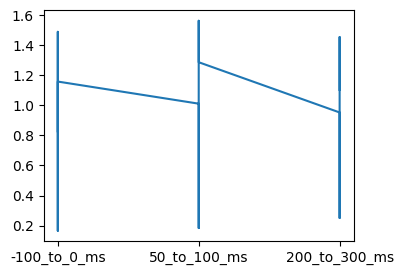

In [20]:
#Peri-stimulus time histogram of normalized MUA recorded from a representative electrode from the chronic VTA array
#impossible to plot because only time range provided instead of actual time values 
plt.figure(figsize=(4, 3))
a=df2[df2.reward_probability==0]
a2=np.array((a['normalized_MUA']),dtype=np.float64)

b=df2[df2.reward_probability==25]
b2=np.array((b['normalized_MUA']),dtype=np.float64)

c=df2[df2.reward_probability==50]
c2=np.array((c['normalized_MUA']),dtype=np.float64)

d=df2[df2.reward_probability==75]
d2=np.array((d['normalized_MUA']),dtype=np.float64)

e=df2[df2.reward_probability==100]
e2=np.array((e['normalized_MUA']),dtype=np.float64)

ay=a['normalized_MUA']
ax=a['time_window']
plt.plot(ax, ay)


### Figure 1b
Mean normalized MUA 200–300 ms after stimulus onset. Error bars a, b denote sem across trials (0%, n = 4823; 25%, n = 4706; 50%, n = 4669; 75%, n = 4672; 100% n = 4668).

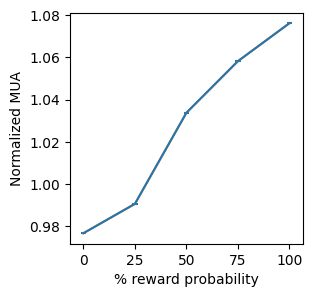

In [30]:
#Mean normalized MUA 200–300 ms after stimulus onset
plt.figure(figsize=(3,3))
df2=df2[df2['time_window']=='200_to_300_ms']

data=[]
def mean_of_list( number):
    x=df2[df2.reward_probability==number]
    y=x['normalized_MUA']
    data.append(mean(y))



mean_of_list(0)

mean_of_list(25)

mean_of_list(50)

mean_of_list(75)

mean_of_list(100)

dataX=[0,25,50,75,100]
plt.ylabel('Normalized MUA')
plt.xlabel('% reward probability')
plt.errorbar(dataX, data, xerr = 1.3)
plt.plot(dataX,data)

### Figure 4f and 4g
Parathreshold f d-prime, and g c-criterion for 0–25% motion stimuli was compared between pre- (40 bins per round, 100 trials/bin) and post-association (20 bins per round, 100 trials per bin, see Methods) phases. Mean values for the paired VF (solid lines) and the control VF (dotted lines) during the pre-and post-association phases were calculated for the group (black lines) and individuals (M1—purple circle; M2—green square)

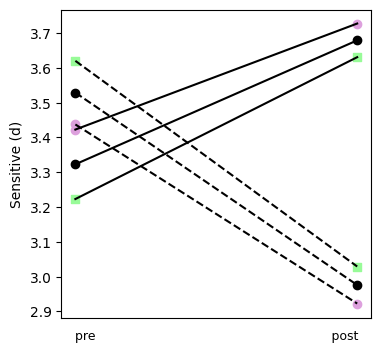

In [47]:
#plot mean of d_prime of paired m1, paired m2, control m1 and control m2 for pre and post 
plt.figure(figsize=(4,4))
df=pd.read_csv("motion_discrimination_d_prime.csv")
df=df.dropna()

pre_data=df[df['pairing']=='pre']
post_data=df[df['pairing']=='post']


def get_data(pre_post,title1, title2, monkey_type,data_type):
    y=df[df['pairing']==pre_post]
    x=y[y['VF']==data_type]
    title1=(np.array((x[x['monkey']==monkey_type]['d_prime']), dtype=np.float64))
    title2=mean(title1)
    return title2

a=get_data('pre','paired_pre_data_m1','a','m1','paired')
c=get_data('pre','control_pre_data_m1','c','m1','control')
e=get_data('post','paired_post_data_m1','e','m1','paired')
g=get_data('post','control_post_data_m1','g','m1','control')
b=get_data('pre','paired_pre_data_m2','b','m2','paired')
d=get_data('pre','control_pre_data_m2','d','m2','control')
f=get_data('post','paired_post_data_m2','f','m2','paired')
h=get_data('post','control_post_data_m2','h','m2','control')




def plot(a,b,c,d,e,f,g,h, title ):

    i=(a+b)/2
    j=(c+d)/2
    k=(e+f)/2
    l=(g+h)/2
    data1=[a,b,c,d,e,f,g,h,i,j,k,l]
    dataX1=[1,1,1,1,2,2,2,2,1,1,2,2]


    y=[a,b,c,d,e,f,g,h,i,j,k,l]
    x=[1,1,1,1,2,2,2,2,1,1,2,2]
    y2=[a,c,e,g]
    x2=[1,1,2,2]
    plt.scatter(x2,y2, marker='o', color='plum')
    y3=[b,d,f,h]
    x3=[1,1,2,2]
    plt.scatter(x3,y3, marker=',', color='palegreen')
    y4=[i,j,k,l]
    x4=[1,1,2,2]
    plt.scatter(x4,y4, color='black')

    def connectpoints(x,y,p1,p2, line):
        x1, x2 = x[p1], x[p2]
        y1, y2 = y[p1], y[p2]
        plt.plot([x1,x2],[y1,y2],linestyle=line, color='black')

    connectpoints(x,y,0,4,'-')
    connectpoints(x,y,1,5,'-')
    connectpoints(x,y,2,6,'--')
    connectpoints(x,y,3,7,'--')
    connectpoints(x,y,8,10,'-')
    connectpoints(x,y,9,11,'--')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    plt.title('pre                                                           post',fontsize=9, y=-0.1)
    plt.ylabel(title)
    plt.show()
plot(a,b,c,d,e,f,g,h, 'Sensitive (d)')

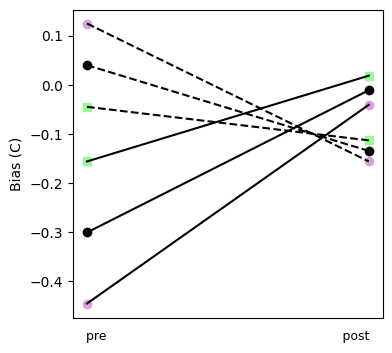

In [49]:
#plot mean of c_crit of paired m1, paired m2, control m1 and control m2 for pre and post 
plt.figure(figsize=(4,4))
f1=pd.read_csv("motion_discrimination_c_criterion.csv")
pre_data=df1[df1['pairing']=='pre']
post_data=df1[df1['pairing']=='post']




def get_data( pre_post,title1, title2, monkey_type,data_type):
    y=df1[df1['pairing']==pre_post]
    x=y[y['VF']==data_type]
    title1=(np.array((x[x['monkey']==monkey_type]['c_crit']), dtype=np.float64))
    title2=-mean(title1)
    return title2


b=get_data('pre','paired_pre_data_m1','b','m1','paired')
d=get_data('pre','control_pre_data_m1','d','m1','control')
f=get_data('post','paired_post_data_m1','f','m1','paired')
h=get_data('post','control_post_data_m1','h','m1','control')
a=get_data('pre','paired_pre_data_m2','a','m2','paired')
c=get_data('pre','control_pre_data_m2','c','m2','control')
e=get_data('post','paired_post_data_m2','e','m2','paired')
g=get_data('post','control_post_data_m2','g','m2','control')


plot(a,b,c,d,e,f,g,h, 'Bias (C)')